In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [13]:
df=pd.read_csv('./Datasets/economic_index.csv')
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price
0,2017,1,3.25,7.10,1974.15
1,2017,2,6.70,10.07,1921.21
2,2017,3,5.39,4.80,2016.35
3,2017,4,4.59,7.63,1987.04
4,2017,5,1.94,8.33,2024.43


In [14]:
df.drop(['Year','Month'],axis=1,inplace=True)

In [15]:
df.head()

,Interest_Rate,Unemployment_Rate,Index_Price
0,3.25,7.10,1974.15
1,6.70,10.07,1921.21
2,5.39,4.80,2016.35
3,4.59,7.63,1987.04
4,1.94,8.33,2024.43


In [16]:
## Checking for null values
df.isnull().sum()

Interest_Rate        0
Unemployment_Rate    0
Index_Price          0
dtype: int64

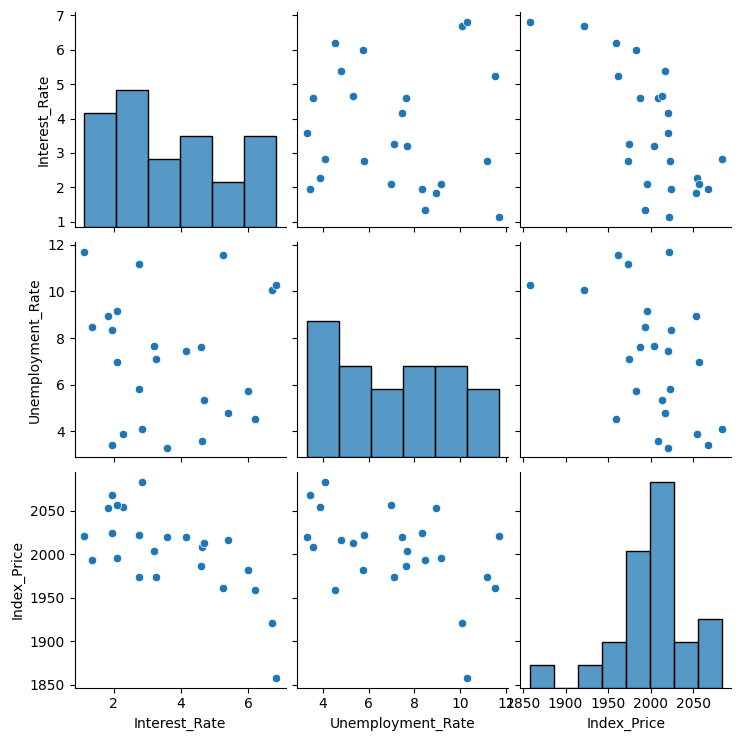

In [17]:
sns.pairplot(df)

In [19]:
df.corr()

,Interest_Rate,Unemployment_Rate,Index_Price
Interest_Rate,1.000000,-0.042233,-0.692903
Unemployment_Rate,-0.042233,1.000000,-0.498384
Index_Price,-0.692903,-0.498384,1.000000


In [21]:
# Independent and dependent features
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
Y

0     1974.15
1     1921.21
2     2016.35
3     1987.04
4     2024.43
5     2067.97
6     1993.94
7     1959.10
8     2008.08
9     1961.31
10    2021.01
11    1857.91
12    1982.52
13    2054.25
14    1996.29
15    2056.75
16    2083.33
17    2020.34
18    2019.92
19    1973.92
20    2013.24
21    2052.87
22    2022.52
23    2003.63
Name: Index_Price, dtype: float64

In [23]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(lr,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)

In [30]:
np.mean(validation_score)

np.float64(-619.9877357662572)

In [33]:
# prediction
Y_pred=lr.predict(X_test)
Y_pred

array([2020.41757964, 2045.11263051, 2013.95152075, 2039.21478249,
       1930.29939026])

Text(0, 0.5, 'Predicted')

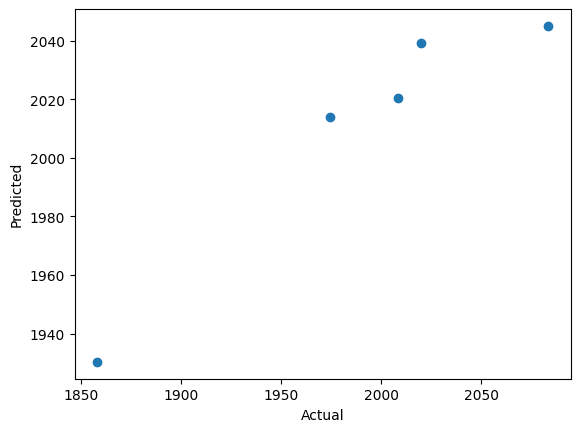

In [34]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0.5, 9.444444444444438, 'Residuals')

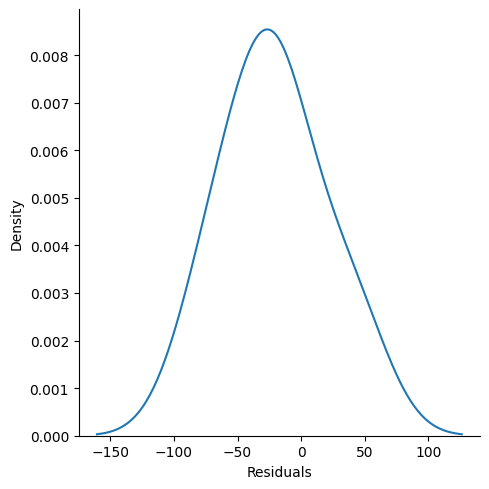

In [35]:
residuals=Y_test-Y_pred
sns.displot(residuals,kind='kde')
plt.xlabel("Residuals") 

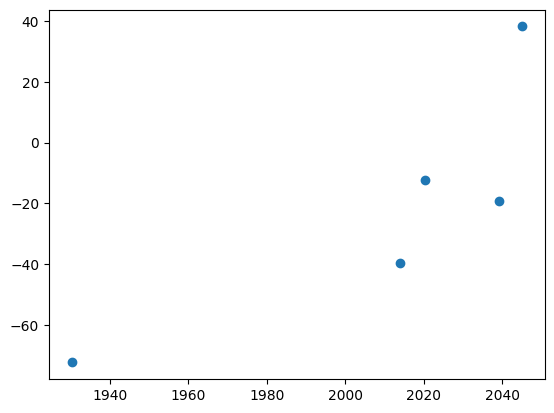

In [36]:
plt.scatter(Y_pred,residuals)